In [65]:
%matplotlib inline
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import plotly.express as px


In [66]:
df_games = pd.read_csv('data/games.csv', lineterminator='\n')
df_meta=pd.read_csv('data/meta_reviews.csv',lineterminator='\n')
df_users=pd.read_csv('data/user_reviews.csv',lineterminator='\n')

In [69]:
df_games.shape, df_meta.shape, df_users.shape


((31149, 18), (163580, 6), (176913, 6))

In [70]:
df_meta.head().transpose()

,0,1,2,3,4
score,42.0,40.0,40.0,95.0,90.0
critic,IGN,Official Nintendo Magazine UK,Nintendo Life,Destructoid,FNintendo
date,"Jan 14, 2013","Jan 27, 2013","Dec 17, 2012","Jun 8, 2014","Nov 5, 2015"
title,007 Legends,007 Legends,007 Legends,1001 Spikes,1001 Spikes
platform,Wii U,Wii U,Wii U,Wii U,Wii U
real_date,2013-01-14,2013-01-27,2012-12-17,2014-06-08,2015-11-05


In [5]:
# si j'utilisais pyplot
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
sns.set_style(style='whitegrid')

### General

__Which console has more games titles ?__

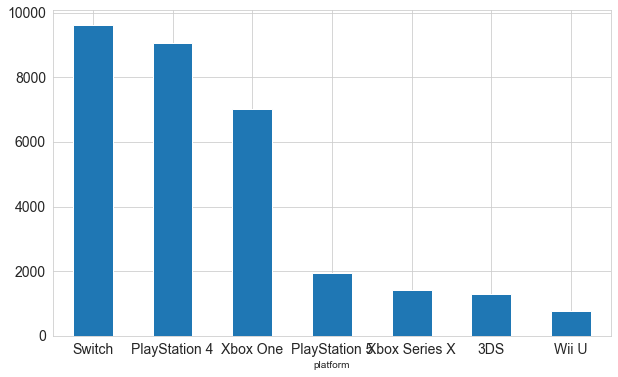

In [72]:
df_games.groupby('platform')['title'].count().sort_values(ascending=False).plot.bar(figsize=(10, 6), rot=0);

Je regarde combien de critiques sont faites par chaque organe identifié dans Metacritique. 
On comprend ici que TheXboxHub a produit 3923 critiques, Nintendo Life 3864... 

In [77]:
df_meta.groupby('critic')['score'].count().sort_values(ascending=False)[:25]
#.plot.bar(figsize=(10, 6), rot=0);

critic
TheXboxHub              3923
Nintendo Life           3864
NintendoWorldReport     2947
God is a Geek           2514
COGconnected            2496
Video Chums             2477
Cubed3                  2397
Push Square             2299
Digitally Downloaded    2297
Vandal                  2281
Multiplayer.it          2169
Everyeye.it             2129
PlayStation Universe    2054
GameSpew                1990
TheSixthAxis            1912
Gaming Age              1822
IGN                     1822
Switch Player           1806
4Players.de             1770
SpazioGames             1758
Jeuxvideo.com           1703
ZTGD                    1702
Xbox Tavern             1700
Metro GameCentral       1655
Destructoid             1654
Name: score, dtype: int64

Given release date let's add two columns with year and month information

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['month'] = df['release_date'].dt.month
df['year'] = df['release_date'].dt.year

EA Sports appears also as 'EA Sports, EA Vancouver' and 'EA Vancouver'. Let's unify the names

In [9]:
df.loc[df['developer'] == 'EA Sports, EA Vancouver', 'developer'] = 'EA Sports'
df.loc[df['developer'] == 'EA Vancouver', 'developer'] = 'EA Sports'

In order to perform analysis related to scores, we need to use those games with reviews

In [10]:
tmp = df.loc[(df['meta_overview'] != 'No score yet') & (df['user_overview'] != 'No user score yet')].copy()

__Which console has best average scores ?__

/var/folders/2h/pylp0hzn5td4mz63q7r0cz0h0000gn/T/ipykernel_30894/3120562876.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmp.groupby('platform')['meta_score', 'n_user_score'].mean().sort_values('meta_score', ascending=False).plot.bar(figsize=(10, 6), rot=0);


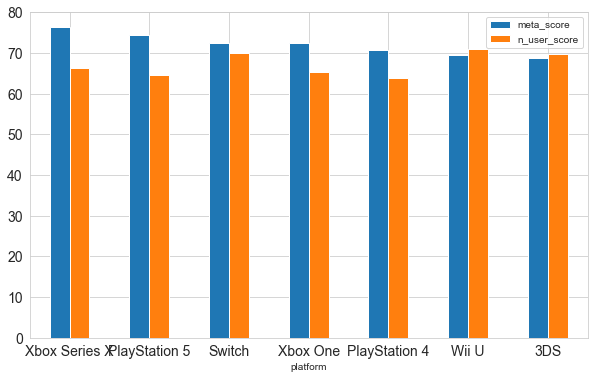

In [11]:
tmp.groupby('platform')['meta_score', 'n_user_score'].mean().sort_values('meta_score', ascending=False).plot.bar(figsize=(10, 6), rot=0);

Let's compare metacritics scores vs user scores. (metacritics scores are made by specialized critics sites while user scores by people registered on metacritic.com)

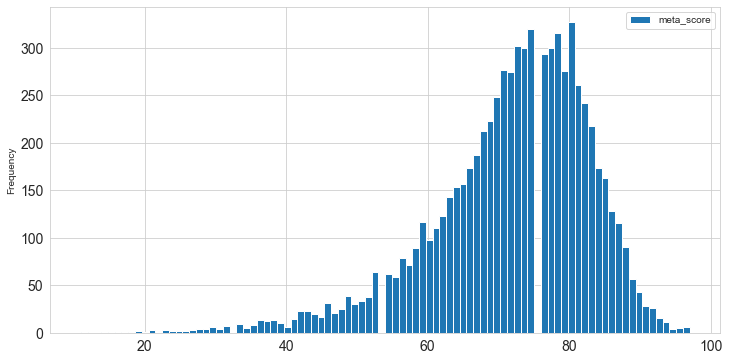

In [16]:
tmp[['meta_score']].plot.hist(bins=90, figsize=(12, 6));

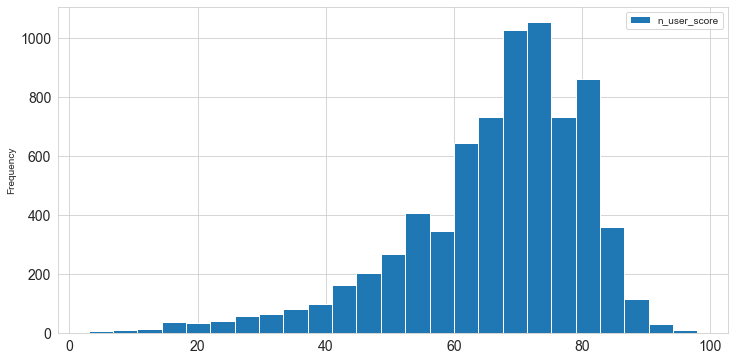

In [17]:
tmp[['n_user_score']].plot.hist(bins=25, figsize=(12, 6));

Meta scores tend to be higher than user scores

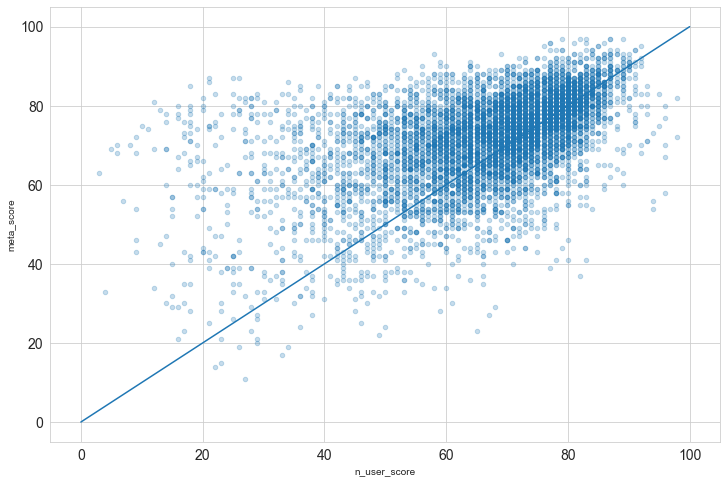

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot([0, 100], [0, 100])
tmp.plot.scatter(x='n_user_score', y='meta_score', ax=ax, alpha=0.25);

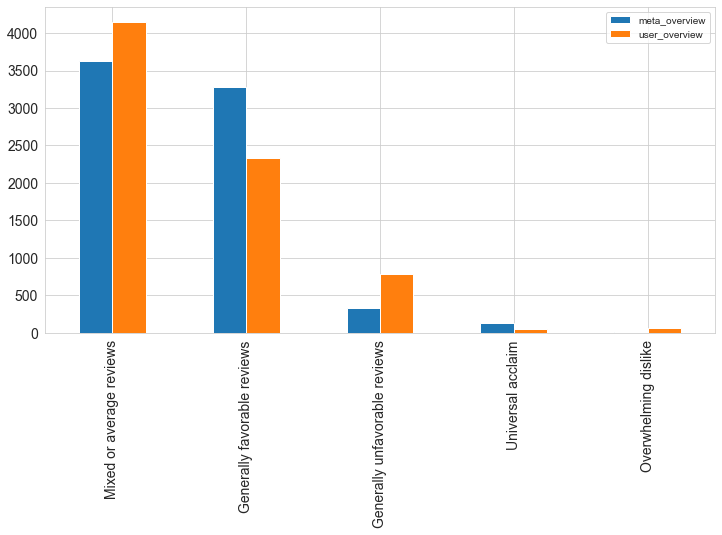

In [19]:
mo = tmp.groupby('meta_overview')['title'].count()
mo.name = 'meta_overview'
uo = tmp.groupby('user_overview')['title'].count()
uo.name = 'user_overview'
pd.concat([mo, uo], axis=1).sort_values('meta_overview', ascending=False).plot.bar(figsize=(12, 6));

We confirm that there are more 'Generally favorable reviews' in meta scores and more 'Generally unfavorable reviews' in user scores. <br>Users tend to be more critic in their reviews than specialized sites (paid reviews ?)

__How many new titles were released since 2014 ?__

Here we compare just PlayStation 4 and Xbox One because both platforms were announced the same year (2013). On the other hand Nintendo Switch in 2016

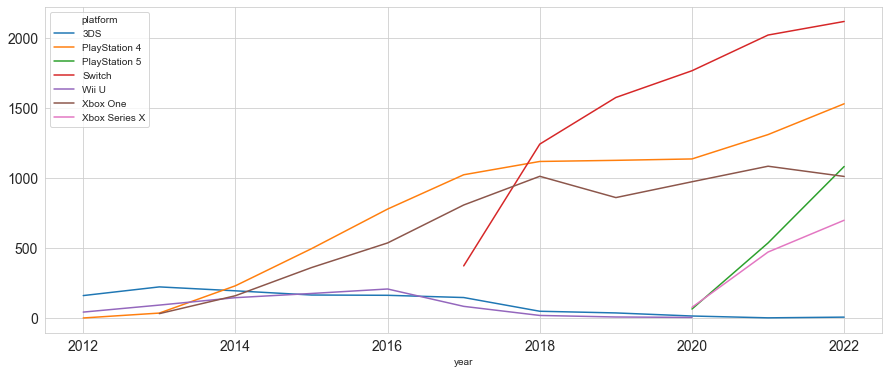

In [25]:
# df.loc[(df['year'] > 2013) & (df['year'] < 2023) & (df['platform'] != 'Switch')].groupby(['year', 'platform'])['title'].count().unstack().plot.bar(figsize=(10, 6));
df.loc[(df['year'] > 2011) & (df['year'] < 2023)].groupby(['year', 'platform'])['title'].count().unstack().plot.line(figsize=(15, 6));

__When are new titles released ?__

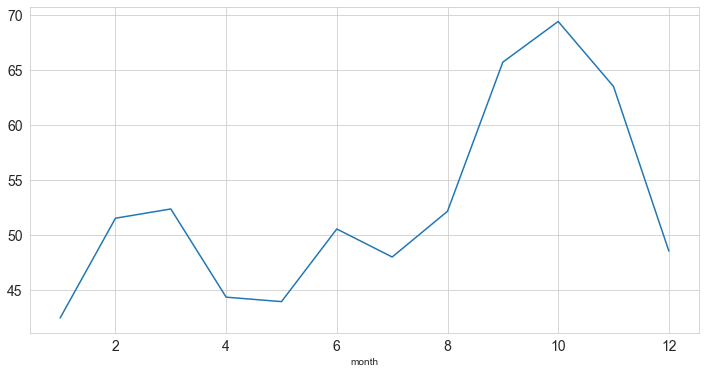

In [29]:
df.groupby(['year', 'month'])['title'].count().groupby('month').mean().plot(figsize=(12, 6));

There's a peak between August and November (anticipating christmas sales?)

__How did average scores evolve since 2014 ?__

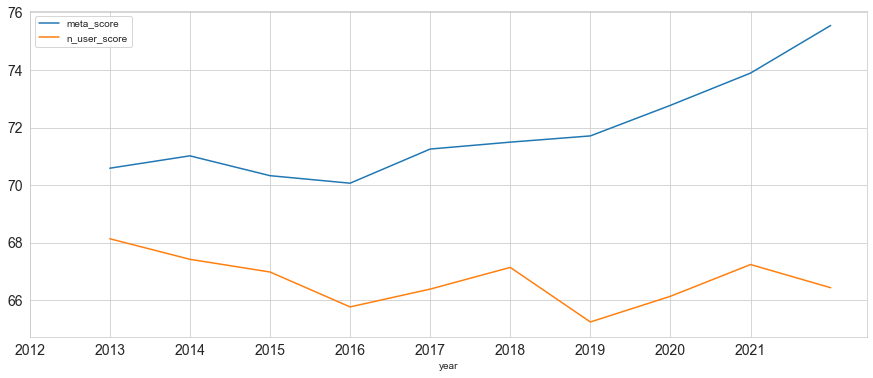

In [31]:
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1, 1, 1)
tmp.loc[(tmp['year'] > 2012) & (tmp['year'] < 2023), ('meta_score', 'year')].groupby('year').mean().plot(ax = ax, xticks=np.arange(2012, 2022, 1))
tmp.loc[(tmp['year'] > 2012) & (tmp['year'] < 2023), ('n_user_score', 'year')].groupby('year').mean().plot(ax = ax, xticks=np.arange(2012, 2022, 1));

No big changes

### Best games

__How many titles per console have metacritic score greater than 85?__

In [32]:
tmp.loc[tmp['meta_score'] >= 85].groupby('platform')['title'].count().sort_values(ascending=False)

platform
PlayStation 4    188
Switch           172
Xbox One         158
PlayStation 5     52
Xbox Series X     52
3DS               40
Wii U             31
Name: title, dtype: int64

__How many titles per console have user score greater than 85?__

In [33]:
tmp.loc[tmp['n_user_score'] >= 85].groupby('platform')['title'].count().sort_values(ascending=False)

platform
PlayStation 4    86
Switch           73
Xbox One         47
Xbox Series X    33
Wii U            23
3DS              20
PlayStation 5    16
Name: title, dtype: int64

Let's add a column with the difference between meta and user score

In [34]:
tmp['dif'] = tmp['meta_score'] - tmp['n_user_score']

In [35]:
ps4 = tmp.loc[tmp['platform'] == 'PlayStation 4']
xone = tmp.loc[tmp['platform'] == 'Xbox One']
switch = tmp.loc[tmp['platform'] == 'Switch']

#### PlayStation 4

__What are the best 20 titles according to metacritic score?__

In [36]:
ps4.sort_values('meta_score', ascending=False).reset_index(drop=True)[['title', 'meta_score', 'n_user_score', 'dif']][:20]

,title,meta_score,n_user_score,dif
0,Grand Theft Auto V,97,83.0,14.0
1,Red Dead Redemption 2,97,87.0,10.0
2,Persona 5 Royal,95,85.0,10.0
3,The Last of Us Remastered,95,92.0,3.0
4,God of War,94,91.0,3.0
5,The Last of Us Part II,93,58.0,35.0
6,Metal Gear Solid V: The Phantom Pain,93,82.0,11.0
7,Persona 5,93,87.0,6.0
8,XCOM 2: War of the Chosen,93,69.0,24.0
9,Uncharted 4: A Thief's End,93,88.0,5.0


For a lot of those titles there's a big difference between what meta critics and users think

__What are the best 20 titles according to user score?__

In [37]:
ps4.sort_values('n_user_score', ascending=False).reset_index(drop=True)[['title', 'n_user_score', 'meta_score', 'dif']][:20]

,title,n_user_score,meta_score,dif
0,Wanderer,98.0,72,-26.0
1,Dynasty Warriors 9 Empires,96.0,58,-38.0
2,Crystar,96.0,67,-29.0
3,Bayonetta & Vanquish,93.0,85,-8.0
4,Star Renegades,93.0,78,-15.0
5,Fatal Frame: Maiden of Black Water,93.0,71,-22.0
6,The Witcher 3: Wild Hunt,92.0,92,0.0
7,The Witcher 3: Wild Hunt - Blood and Wine,92.0,91,-1.0
8,Infinifactory,92.0,70,-22.0
9,The Evil Within: The Assignment,92.0,80,-12.0


With exception of AO Tennis, meta critics and users scores seem to be similar

__What are the top 10 titles most overrated by metacritic? (user point of view)__

In [39]:
ps4.sort_values('dif', ascending=False)[:20][['title', 'meta_score', 'n_user_score', 'dif']].reset_index(drop=True)

,title,meta_score,n_user_score,dif
0,ZEN Pinball 2: Ant-Man Pinball,81,12.0,69.0
1,FIFA 20,79,13.0,66.0
2,NBA 2K20,78,14.0,64.0
3,FIFA 21,72,9.0,63.0
4,Tom Clancy's The Division 2: Warlords of New York,74,11.0,63.0
5,Madden NFL 20,76,14.0,62.0
6,NBA 2K18,80,18.0,62.0
7,Tales of Symphonia Remastered,70,8.0,62.0
8,Megaquarium,78,16.0,62.0
9,FIFA 19,83,22.0,61.0


__What are the top 10 titles most underrated by metacritic? (user point of view)__

In [40]:
ps4.sort_values('dif')[:10][['title', 'meta_score', 'n_user_score', 'dif']].reset_index(drop=True)

,title,meta_score,n_user_score,dif
0,Left Alive,37,82.0,-45.0
1,Dynasty Warriors 9 Empires,58,96.0,-38.0
2,Dead or Alive Xtreme 3: Fortune,43,75.0,-32.0
3,Crystal Rift,37,66.0,-29.0
4,Crystar,67,96.0,-29.0
5,AO Tennis,44,73.0,-29.0
6,Big Bash Boom,55,83.0,-28.0
7,Terminator: Resistance,47,75.0,-28.0
8,Energy Hook,22,49.0,-27.0
9,Spuds Unearthed,43,70.0,-27.0


Let's see more information about AO Tennis

In [41]:
ps4.loc[ps4['title'] == 'AO Tennis'].transpose()

,1242
title,AO Tennis
platform,PlayStation 4
developer,Big Ant Studios
genre,"['Sports', 'Individual', 'Tennis']"
rating,NaN
release_date,2018-01-16 00:00:00
meta_score,44
meta_overview,Generally unfavorable reviews
meta_pos,0
meta_mixed,2


It's a new game with few critics reviews

### Exclusive games

In [42]:
ps4_list = set(df.loc[df['platform'] == 'PlayStation 4', 'title'])
xone_list = set(df.loc[df['platform'] == 'Xbox One', 'title'])
switch_list = set(df.loc[df['platform'] == 'Switch', 'title'])

#### PlayStation 4

__How many exclusive games PlayStation 4 got?__

In [43]:
ps4_exclusives = tmp.loc[tmp['title'].isin(list(ps4_list.difference(xone_list).difference(switch_list))), ('title', 'n_user_score', 'meta_score')].sort_values('n_user_score', ascending=False).reset_index(drop=True)
len(ps4_exclusives)

700

__What are the top 25 exclusives PlayStation 4 games?__

In [44]:
ps4_exclusives[:25]

,title,n_user_score,meta_score
0,Wanderer,98.0,72
1,Infinifactory,92.0,70
2,The Last of Us Remastered,92.0,95
3,Ghost of Tsushima,91.0,83
4,God of War,91.0,94
5,Astro Bot: Rescue Mission,90.0,90
6,NieR: Automata,89.0,88
7,Bloodborne: The Old Hunters,89.0,87
8,Bloodborne,89.0,92
9,NieR: Automata - Game of the YoRHa Edition,89.0,91


__How many exlusive PlayStation 4 games have user score equal or greater than 80 ?__

In [45]:
len(ps4_exclusives.loc[ps4_exclusives['n_user_score'] >= 80])

87

#### Xbox One

__How many exclusive games Xbox One got?__

In [46]:
xone_exclusives = tmp.loc[tmp['title'].isin(list(xone_list.difference(ps4_list).difference(switch))), ('title', 'n_user_score', 'meta_score')].sort_values('n_user_score', ascending=False).reset_index(drop=True)
len(xone_exclusives)

325

__What are the top 25 exclusives Xbox One games?__

In [47]:
xone_exclusives[:25]

,title,n_user_score,meta_score
0,NieR: Automata - Become as Gods Edition,91.0,90
1,Ori and the Will of the Wisps,89.0,90
2,Syberia: The World Before,88.0,82
3,Ori and the Will of the Wisps,87.0,92
4,Ori and the Will of the Wisps,87.0,93
5,Ori and the Blind Forest,86.0,88
6,Age of Empires II: Definitive Edition,86.0,86
7,Katana ZERO,85.0,83
8,Ori and the Blind Forest: Definitive Edition,85.0,90
9,Floppy Knights,85.0,69


__How many exlusive Xbox One games have user score equal or greater than 80 ?__

In [48]:
len(xone_exclusives.loc[xone_exclusives['n_user_score'] >= 80])

44

#### Switch

__How many exclusive games Switch got?__

In [49]:
switch_exclusives = tmp.loc[tmp['title'].isin(list(switch_list.difference(ps4_list).difference(xone_list))), ('title', 'n_user_score', 'meta_score')].sort_values('n_user_score', ascending=False).reset_index(drop=True)
len(switch_exclusives)

666

__What are the top 25 exclusives Switch games?__

In [50]:
switch_exclusives[:25]

,title,n_user_score,meta_score
0,Ultra Kaiju Monster Rancher,95.0,75
1,Touken Ranbu Warriors,92.0,68
2,Monster Rancher 1 & 2 DX,90.0,70
3,Bayonetta 2,89.0,91
4,Fire Emblem Warriors: Three Hopes,89.0,81
5,Donkey Kong Country: Tropical Freeze,89.0,83
6,Astral Chain,89.0,87
7,Super Mario Odyssey,89.0,97
8,Kirby and the Forgotten Land,88.0,85
9,Xenoblade Chronicles: Definitive Edition,88.0,89


__How many exlusive Switch games have user score equal or greater than 80 ?__

In [51]:
len(switch_exclusives.loc[switch_exclusives['n_user_score'] >= 80])

146

### Developers

#### PlayStation 4

__Who are the top 10 developers with more released titles?__

In [52]:
ps4.groupby('developer')['title'].count().sort_values(ascending=False)[:10]

developer
Telltale Games          53
Capcom                  41
Square Enix             31
Omega Force             23
Ubisoft Montreal        21
EA Sports               20
Zen Studios             20
Bandai Namco Games      18
Milestone S.r.l         16
Nippon Ichi Software    16
Name: title, dtype: int64

__Does quantity mean quality?__

In [53]:
dev = pd.concat([ps4.groupby('developer')['title'].count(), ps4.groupby('developer')['n_user_score'].mean(), ps4.groupby('developer')['meta_score'].mean()], axis=1)
dev.columns = ['count', 'n_user_score_avg', 'meta_score_avg']
dev.sort_values('count', ascending=False)[:10]

,count,n_user_score_avg,meta_score_avg
developer,,,
Telltale Games,53,65.811321,73.150943
Capcom,41,70.121951,76.195122
Square Enix,31,76.580645,76.290323
Omega Force,23,74.000000,71.826087
Ubisoft Montreal,21,66.428571,71.761905
EA Sports,20,45.800000,73.550000
Zen Studios,20,54.200000,78.350000
Bandai Namco Games,18,58.611111,68.666667
Milestone S.r.l,16,60.312500,69.625000


It seems that not

__Who are the best 10 developers according to user score (at least 4 released titles)?__

In [54]:
dev.loc[dev['count'] >= 4].sort_values('n_user_score_avg', ascending=False)[:10]

,count,n_user_score_avg,meta_score_avg
developer,,,
CD Projekt Red Studio,4,86.750000,88.250000
Tango Gameworks,5,83.000000,73.000000
From Software,9,83.000000,83.333333
Falcom,10,81.200000,79.300000
Arkane Studios,5,81.000000,82.400000
Ryu ga Gotoku Studios,10,79.800000,80.400000
Naughty Dog,4,79.500000,91.250000
id Software,6,77.833333,78.666667
Grasshopper Manufacture,4,77.250000,66.750000


__What are the titles that gave them such a good reputation ?__

From Software

In [55]:
ps4.loc[ps4['developer'] == 'From Software', 'title'].reset_index(drop=True)

0                                 Bloodborne
1                Bloodborne: The Old Hunters
2    Dark Souls II: Scholar of the First Sin
3                             Dark Souls III
4          Dark Souls III: Ashes of Ariandel
5            Dark Souls III: The Ringed City
6                      Dark Souls Remastered
7                                   Deracine
8                  Sekiro: Shadows Die Twice
Name: title, dtype: object

DONTNOD Entertainment

In [56]:
ps4.loc[ps4['developer'] == 'DONTNOD Entertainment', 'title'].reset_index(drop=True)

0                               Life is Strange
1                             Life is Strange 2
2          Life is Strange 2: Episode 1 - Roads
3          Life is Strange 2: Episode 2 - Rules
4     Life is Strange 2: Episode 3 - Wastelands
5          Life is Strange 2: Episode 4 - Faith
6         Life is Strange 2: Episode 5 - Wolves
7        Life is Strange: Episode 1 - Chrysalis
8      Life is Strange: Episode 2 - Out of Time
9     Life is Strange: Episode 3 - Chaos Theory
10       Life is Strange: Episode 4 - Dark Room
11       Life is Strange: Episode 5 - Polarized
12     The Awesome Adventures of Captain Spirit
13                                       Vampyr
Name: title, dtype: object

__Who are the top 10 developers whose titles are on average more overrated by metacritic (at least 4 released titles) ?__

In [57]:
dev = pd.concat([ps4.groupby('developer')['dif'].mean().sort_values(ascending=False), ps4.groupby('developer')['title'].count()], axis=1)
dev.columns = ['dif_avg', 'count']
dev.loc[dev['count'] >= 4].sort_values('dif_avg', ascending=False)[:10]

,dif_avg,count
developer,,
Electronic Arts,55.142857,7
Sledgehammer Games,39.800000,5
Visual Concepts,38.500000,10
Treyarch,33.714286,7
Infinity Ward,33.555556,9
Bungie,30.333333,9
EA Sports,27.750000,20
Massive Entertainment,25.250000,4
Zen Studios,24.150000,20


__What are the top 10 EA Sports games according to metacritic?__

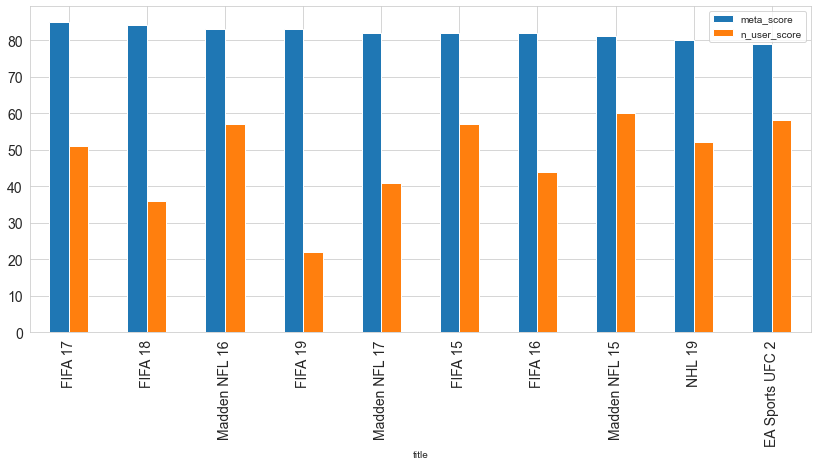

In [58]:
ea = ps4.loc[ps4['developer'] == 'EA Sports', ['title', 'meta_score', 'n_user_score']].sort_values('meta_score', ascending=False)[:10]
ea.set_index('title').plot.bar(figsize=(14, 6));

__Who are the top 10 developers whose titles are on average more underrated by metacritic (at least 4 released titles)?__

In [59]:
dev.loc[dev['count'] >= 4].sort_values('dif_avg')[:10]

,dif_avg,count
developer,,
Grasshopper Manufacture,-10.500000,4
Tango Gameworks,-10.000000,5
Big Ant Studios,-8.500000,8
Dimps Corporation,-7.800000,5
CyberConnect2,-4.571429,7
Koei Tecmo Games,-4.538462,13
Acquire,-3.833333,6
Omega Force,-2.173913,23
"Cyanide, Cyanide Studios",-2.000000,4


In [60]:
ps4.loc[ps4['developer'] == 'Grasshopper Manufacture', 'title'].reset_index(drop=True)

0                                           Let It Die
1                       The 25th Ward: The Silver Case
2                                      The Silver Case
3    Travis Strikes Again: No More Heroes - Complet...
Name: title, dtype: object

In [61]:
ps4.loc[ps4['developer'] == 'Acquire', 'title'].reset_index(drop=True)

0         Aegis of Earth: Protonovus Assault
1                               Akiba's Beat
2        Akiba's Trip: Hellbound & Debriefed
3           Akiba's Trip: Undead & Undressed
4    Katana Kami: A Way of the Samurai Story
5                      No Heroes Allowed! VR
Name: title, dtype: object

### Ratings

__How many titles per rating category?__

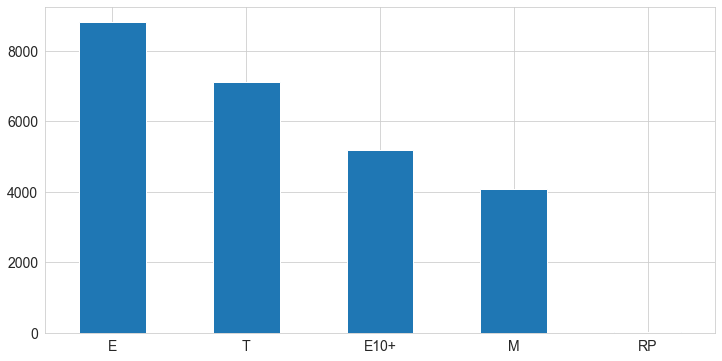

In [62]:
df['rating'].value_counts().plot.bar(figsize=(12, 6), rot=0);

E: Everyone
<br/>E+10: Everyone +10
<br/>T: Teen +13
<br/>M: Mature +17

__Which console is more "family" oriented?__

In [63]:
qty = df.loc[(df['rating'].isnull() == False) & (df['rating'] != 'RP')].groupby('platform')['title'].count()
#((df.loc[df['rating'] != 'RP'].groupby(['platform', 'rating'])['title'].count().unstack().transpose() / qty) * 100).plot.bar(figsize=(12, 6), rot=0);
rat = (df.loc[df['rating'] != 'RP'].groupby(['platform', 'rating'])['title'].count().unstack().transpose() / qty) * 100
rat = rat[['PlayStation 4', 'Xbox One', 'Switch']]

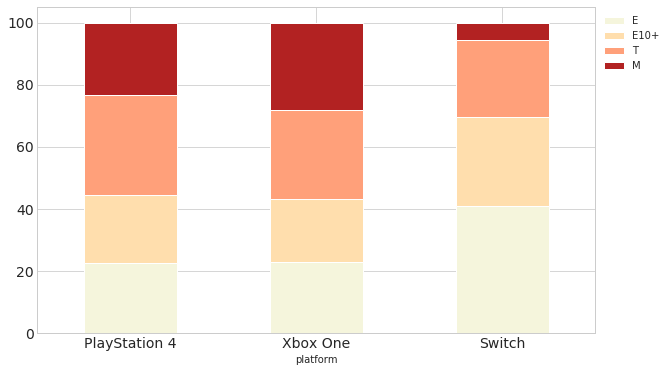

In [106]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1, 1, 1)
rat.iloc[0].plot.bar(ax=ax, color='beige', edgecolor='white', label=rat.index[0]);
rat.iloc[1].plot.bar(ax=ax, bottom=rat.iloc[0], color='navajowhite', edgecolor='white', label=rat.index[1]);
rat.iloc[3].plot.bar(ax=ax, bottom=rat.iloc[:2].sum().values, color='lightsalmon', edgecolor='white', label=rat.index[3]);
rat.iloc[2].plot.bar(ax=ax, bottom=(rat.iloc[:2].sum() + rat.iloc[3]).values, color='firebrick', edgecolor='white', label=rat.index[2], rot=0);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1);

Switch has in proportion more games suited for everyone

__Which category has the best games ?__

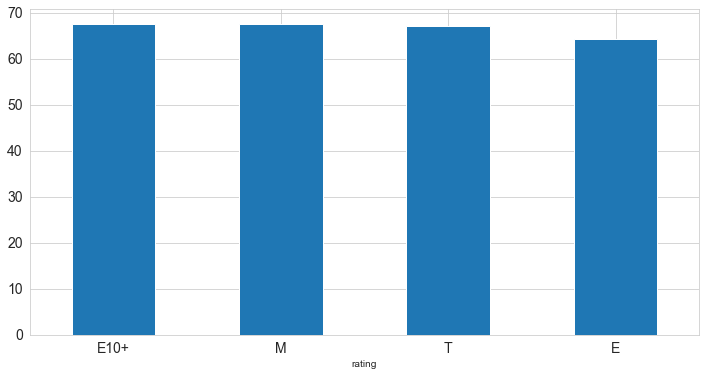

In [64]:
tmp.loc[(tmp['rating'].isnull() == False) & (tmp['rating'] != 'RP')].groupby('rating')['n_user_score'].mean().sort_values(ascending=False).plot.bar(figsize=(12, 6), rot=0);

Mature category seems to has an advantage